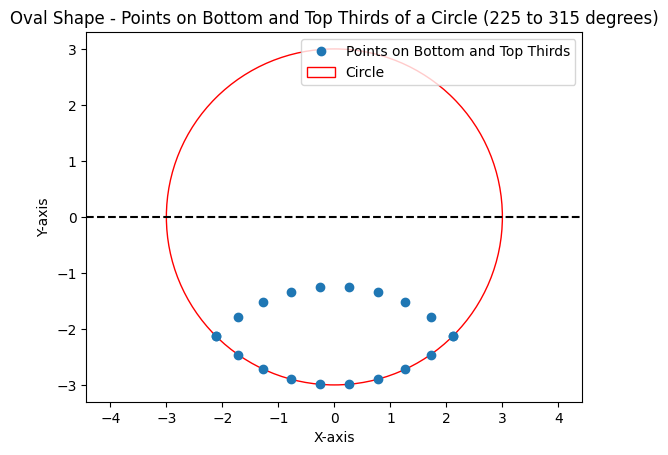

[-2.12132034 -1.72072931 -1.26785479 -0.77645714 -0.26146723  0.26146723
  0.77645714  1.26785479  1.72072931  2.12132034 -2.12132034 -1.72072931
 -1.26785479 -0.77645714 -0.26146723  0.26146723  0.77645714  1.26785479
  1.72072931  2.12132034] [-2.12132034 -2.45745613 -2.71892336 -2.89777748 -2.98858409 -2.98858409
 -2.89777748 -2.71892336 -2.45745613 -2.12132034 -2.12132034 -1.78518455
 -1.52371733 -1.34486321 -1.25405659 -1.25405659 -1.34486321 -1.52371733
 -1.78518455 -2.12132034]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def points_on_bottom_and_top_third_of_circle(radius, num_points):
    theta = np.linspace(np.radians(225), np.radians(315), num_points)
    
    # Parametric equations for the bottom third of a circle
    x_bottom = radius * np.cos(theta)
    y_bottom = radius * np.sin(theta)
    
    # Mirror the bottom points to create the top points
    x_top = x_bottom
    y_top = -y_bottom + (y_bottom[0]*2)
    
    # Combine bottom and top points
    x_combined = np.concatenate([x_bottom, x_top])
    y_combined = np.concatenate([y_bottom, y_top])
    
    return x_combined, y_combined

# Example usage
radius = 3 #in
num_points = 10
x_points, y_points = points_on_bottom_and_top_third_of_circle(radius, num_points)

# Plotting the points and the circle
plt.plot(x_points, y_points, 'o', label='Points on Bottom and Top Thirds')
circle = plt.Circle((0, 0), radius, color='r', fill=False, label='Circle')
plt.gca().add_patch(circle)
plt.axhline(0, color='k', linestyle='--')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Oval Shape - Points on Bottom and Top Thirds of a Circle (225 to 315 degrees)')
plt.legend()
plt.show()
print(x_points, y_points)

In [2]:
#Research Paper 1

# import numpy as np
# #InverseKinematics.py

# #Calculating the joint angles needed to achieve a certain position of the end effector (foot)
# #Given a desired position for the foot, compute the necessary angles for each servo in a leg.

# #Calculations derived from https://www.mdpi.com/2076-3417/12/9/4358

# def calculate_theta1(Px, Pz, L1, L2, L3):
#     # Calculate a and b
#     a = ((L1 / 2) * L2) - (Px * L2) + (L2 * L3)
#     b = Px**2 - 2 * Px * (L1 / 2) - 2 * Px * L3 + Pz**2 + (L1 / 2)**2 + L1 * L3 + L3**2

#     # Calculate sθ1 and cθ1
#     s_theta1 = ((L1 / 2) - Px + L3) * a / (Pz * b - (L2 / 2) * Pz)
#     c_theta1 = a + Pz * np.sqrt(b - L2**2) / b

#     # Calculate θ1
#     theta1 = np.arctan2(s_theta1, c_theta1)

#     return theta1

# def calculate_theta2(Px, Pz, L1, L5):
#     # Calculate c and d
#     c = -4 * Px**2 - 8 * Px * (L1 / 2) - 4 * Pz**2 + L5**2 - 4 * (L1 / 2)**2
#     d = Px**2 + 2 * Px * (L1 / 2) + Pz**2 + (L1 / 2)**2
#     print(c)
#     # Calculate sθ2 and cθ2
#     s_theta2 = Pz * (L5 + np.sqrt(d)) / (2 * d)
#     c_theta2 = (Px + (L1 / 2)) * (L5 + np.sqrt(c)) / (2 * d)

#     # Calculate θ2
#     theta2 = np.arctan2(s_theta2, c_theta2)

#     return theta2

# ##Testing the functions
# # Define link lengths and foot position (replace with actual values)
# L1, L2, L3, L5 = 1.93, .869, 3.119, 0.869 #in

# theta1 = calculate_theta1(-1, 0.0001,L1, L2, L3)
# theta2 = calculate_theta2(-1, 0.0001, L1, L5)

# print(f"Theta1: {np.degrees(theta1)} degrees")
# print(f"Theta2: {np.degrees(theta2)} degrees")

# for Px,Pz in zip(x_points, y_points):
#     # Calculate joint angles
#     theta1 = calculate_theta1(Px, Pz, L1, L2, L3)
#     theta2 = calculate_theta2(Px, Pz, L1, L5)

#     # Print the results
#     print(f"Theta1: {np.degrees(theta1)} degrees")
#     print(f"Theta2: {np.degrees(theta2)} degrees")

In [10]:
#Second Research Paper
l, l1, l2 = 1.93, .869, 3.119 #in

def calculate_theta1(x, y):
    l_AC = np.sqrt(x**2 + y**2)
    l_EC = np.sqrt((x-l)**2 +y**2)
    angle_CAE = np.arccos((l**2 + l_AC**2 - l_EC**2)/(4*l_AC*l))
    c = (l1**2 + l_AC**2 - l2**2)/(2*l1*l_AC)
    print("c: ", c)
    angle_BAC = np.arccos(c)
    return angle_CAE - angle_BAC

def calculate_theta2(x, y):
    lAC= np.sqrt((x**2)+(y**2))
    lEC= np.sqrt(((x-l)**2)+(y**2))

    thet_1 = ((l**2)+(lEC**2)-(lAC**2))/(4*l*lEC)
    thet_2 = ((l1**2)+(lEC**2)-(l2**2))/(2*lEC*l1)
    CEA = np.arccos(thet_1)
    CED = np.arccos(thet_2)

    theta2= np.pi -CEA-CED
    return theta2
    
theta1 = calculate_theta1(l/2, l2+.693)
theta2 = calculate_theta2(l/2, l2+.693)

print(f"Theta1: {np.degrees(theta1)} degrees")
print(f"Theta2: {np.degrees(theta2)} degrees")

for Px,Py in zip(x_points, y_points):
    # Calculate joint angles
    theta1 = calculate_theta1(Px, -Py)
    theta2 = calculate_theta2(Px, -Py)

    # Print the results
    print(f"Theta1: {np.degrees(theta1)} degrees")
    print(f"Theta2: {np.degrees(theta2)} degrees")

c:  0.949566220892199
Theta1: 64.67755196790854 degrees
Theta2: 78.77384714390364 degrees
c:  0.005178365937859124
Theta1: 21.001510893683598 degrees
Theta2: nan degrees
c:  0.005178365937859124
Theta1: 16.962468513106295 degrees
Theta2: nan degrees
c:  0.005178365937859124
Theta1: 12.495781529496982 degrees
Theta2: nan degrees
c:  0.0051783659378598045
Theta1: 7.732172065180052 degrees
Theta2: 98.29056746844009 degrees
c:  0.005178365937859124
Theta1: 2.7943188839680815 degrees
Theta2: 64.86092953050851 degrees
c:  0.005178365937859124
Theta1: -2.2009192058717177 degrees
Theta2: 41.561244558422025 degrees
c:  0.005178365937859124
Theta1: -7.138772387083662 degrees
Theta2: 18.66061222112468 degrees
c:  0.0051783659378598045
Theta1: -11.90238185140058 degrees
Theta2: -6.785914508715776 degrees
c:  0.005178365937859124
Theta1: -16.369068835009955 degrees
Theta2: -39.963171926682136 degrees
c:  0.005178365937858784
Theta1: -20.408111215587287 degrees
Theta2: nan degrees
c:  0.005178365937

C:\Users\jaral\AppData\Local\Temp\ipykernel_21800\3122954588.py:20: RuntimeWarning: invalid value encountered in arccos
  CED = np.arccos(thet_2)
C:\Users\jaral\AppData\Local\Temp\ipykernel_21800\3122954588.py:10: RuntimeWarning: invalid value encountered in arccos
  angle_BAC = np.arccos(c)
